In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
articles_dataset_root_path = 'data/'
articles = pd.read_csv(articles_dataset_root_path + 'preprocessed_articles.csv', sep = ';', index_col = [0])

In [3]:
valid_dates = [d for d in articles.date.unique().tolist() if '2020-06' not in d]
articles = articles[articles.date.isin(valid_dates)]

# Analysis based on arbitrary keywords

In [4]:
keywords = ['covid', 'coronavirus','covid 19']#,mascherina, 'medico', 'ospedale', 'emergenza', 'paziente', 'contagio', 'mascherina', 'pandemia', 'quarantena', 'positive']
keywords_regex = '|'.join(keywords) # For condition in the .contains
articles_with_covid_keywords = articles[articles.title.str.contains(keywords_regex) | articles.content.str.contains(keywords_regex)]
articles_with_covid_keywords

,title,content,date,author,region,zone
0,d’albert riunion anci regional decar,teram president gianguid d’albert partecip riu...,2020-04-15,Abruzzonews,Abruzzo,Centre
1,"coronavirus, novit introdott dpcm 10 april 2020",sit minister dell’intern stat pubblic dirett i...,2020-04-15,Abruzzonews,Abruzzo,Centre
2,"coronavirus, nuov misur vend gener alimentar a...","pescar oggi, mercoled 15 aprile, president reg...",2020-04-15,Abruzzonews,Abruzzo,Centre
3,"regione, ecco guid formazion distanz iefp",pescar ver propr guid oper grad rispond dubb i...,2020-04-15,Abruzzonews,Abruzzo,Centre
5,"inps abruzzo: aggiorn dat indenn 600 euro, cig...",region l’inps abruzz fortement impegn difficil...,2020-04-15,Abruzzonews,Abruzzo,Centre
...,...,...,...,...,...,...
24575,coronavirus mondo: usa mort ogni 44 second april,"accus pompe cina""c numer prov fatt coronavirus...",2020-05-03,La Repubblica,Lazio,Centre
24576,"coronavirus, carcer arriv 1000 oper sanitar",mill nuov oper sanitar carcer italiane. e' pia...,2020-05-03,La Repubblica,Lazio,Centre
24581,"coronavirus italia, 3691 denunc prim giorn fas 2","rom - aspett boom sanzion prim giorn fas due, ...",2020-05-05,La Repubblica,Lazio,Centre
24582,"coronavirus, medicina, denunc azione: ""tropp p...","ventiduemil medic pront entrar specialità, and...",2020-05-06,La Repubblica,Lazio,Centre


In [5]:
prociv_data = pd.read_csv(articles_dataset_root_path + 'prociv_data.csv', sep = ';', index_col = [0])
#prociv_data = prociv_data.loc[:, ['data', 'totale_positivi']]
prociv_data = prociv_data.rename(columns = {'data':'date'})
prociv_data = prociv_data.groupby('date').sum()
prociv_data = prociv_data.reset_index()
prociv_data = prociv_data.loc[:, ['date','totale_positivi']]
prociv_data

,date,totale_positivi
0,2020-02-24,221
1,2020-02-25,311
2,2020-02-26,385
3,2020-02-27,588
4,2020-02-28,821
...,...,...
146,2020-07-19,12440
147,2020-07-20,12404
148,2020-07-21,12248
149,2020-07-22,12322


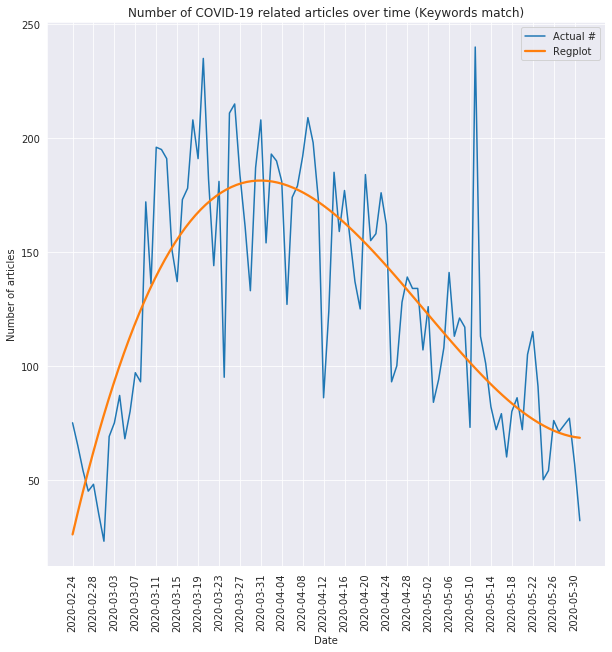

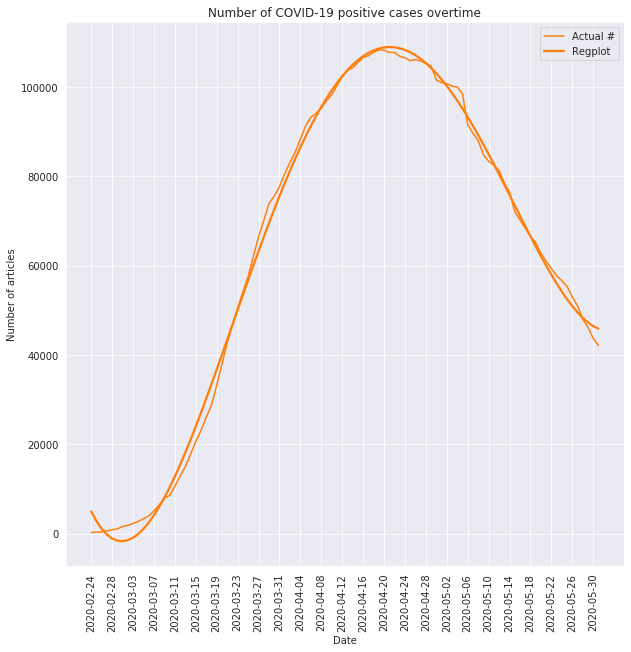

In [8]:
import matplotlib.ticker as plticker
import matplotlib
from datetime import datetime

sns.set_style("darkgrid")
keywords = ['covid', 'coronavirus','covid 19']#, 'medico', 'ospedale', 'emergenza', 'paziente', 'contagio', 'mascherina', 'pandemia', 'quarantena', 'positive']

keywords_regex = '|'.join(keywords) # For condition in the .contains
articles_with_covid_keywords = articles[articles.title.str.contains(keywords_regex) | articles.content.str.contains(keywords_regex)]


count_articles_dataset = articles_with_covid_keywords.groupby('date').count().iloc[:,0]

total_positive = prociv_data.merge(articles_with_covid_keywords.groupby('date').count(), on = 'date', how = 'inner').loc[:, ['totale_positivi']]['totale_positivi'].values

dates = count_articles_dataset.index

fig, ax = plt.subplots(figsize=(10, 10))    

sns.lineplot(dates, count_articles_dataset.values, ax = ax);
sns.regplot(range(len(dates)), count_articles_dataset.values, ax = ax, order = 3, scatter = False, ci = None);


#sns.lineplot(dates, total_positive, ax = ax);
#sns.regplot(range(len(dates)), total_positive, ax = ax, order = 3, scatter = False, ci = None);


ax.set_xticks(dates[::4])
ax.set_xticklabels(dates[::4], rotation=90)
ax.legend(['Actual #', 'Regplot'])
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.title('Number of COVID-19 related articles over time (Keywords match)')
plt.savefig('plots/only_keywords_national.png')
plt.show(ax)

#----------------------------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 10))    

#sns.lineplot(dates, count_articles_dataset.values, ax = ax);
#sns.regplot(range(len(dates)), count_articles_dataset.values, ax = ax, order = 3, scatter = False, ci = None);


sns.lineplot(dates, total_positive, ax = ax, color = 'C1');
sns.regplot(range(len(dates)), total_positive, ax = ax, order = 4, scatter = False, ci = None, color = 'C1');


ax.set_xticks(dates[::4])
ax.set_xticklabels(dates[::4], rotation=90)
ax.legend(['Actual #', 'Regplot'])
plt.xlabel('Date')
plt.ylabel('Number of articles')
plt.title('Number of COVID-19 positive cases overtime')

plt.savefig('plots/only_total_positive_national.png')
plt.show(ax)

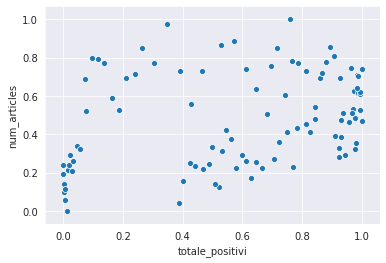

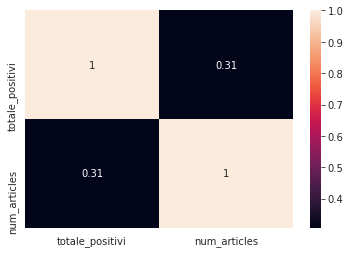

In [7]:
from sklearn.preprocessing import MinMaxScaler as Scaler

d = prociv_data.merge(articles_with_covid_keywords.groupby('date').count().reset_index())
d = d.rename(columns = {'title':'num_articles'}).loc[:, ['totale_positivi','num_articles']]
scaler = Scaler()
d = scaler.fit_transform(d[['totale_positivi', 'num_articles']])
d = pd.DataFrame(d, columns = ['totale_positivi','num_articles'])

sns.scatterplot(d['totale_positivi'], d['num_articles'])
plt.show()
sns.heatmap(d.corr(), annot = True)
plt.show()